In [41]:
import numpy as np
import pandas as pd
import json
from PIL import Image
Image.MAX_IMAGE_PIXELS = None
import cv2
import seaborn as sns

In [2]:
annotations = r"\\shelter\Kyu\unstain2stain\tiles\registered_stitched\OTS_14684_3_he.geojson"

In [3]:
with open(annotations) as f:
      features = json.load(f)["features"]

In [4]:
contour_df = pd.DataFrame({'contour':[np.squeeze(_['geometry']['coordinates']) for _ in features]})

C:\Users\Kevin\.conda\envs\wsi_analysis1\lib\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


In [5]:
classlabel_list = []
for idx in range(len(features)):
      contour = features[idx]
      classlabel = contour["properties"]["classification"]["name"]
      classlabel_list.append(classlabel)

In [6]:
label_df = pd.DataFrame(classlabel_list,columns=["label"])
final_df = pd.concat([contour_df,label_df],axis=1)
final_df

,contour,label
0,"[[38297.0, 67349.0], [38295.0, 67350.0], [3829...",corneum
1,"[[38070.0, 67032.0], [38056.0, 67033.0], [3804...",spinosum
2,"[[38305.5, 67369.0], [38304.0, 67370.0], [3830...",white
3,"[[38023.0, 66903.0], [38014.0, 66904.0], [3800...",ecm
4,"[[38089.0, 58716.0], [38089.0, 58719.0], [3809...",hairfollicle
...,...,...
98,"[[46352, 66260], [46350, 66262], [46348, 66262...",spinosum
99,"[[67227, 54067], [67227, 54069], [67225, 54069...",sweat
100,"[[58940, 56662], [58940, 56663], [58939, 56663...",sweat
101,"[[19400.0, 55087.0], [19400.0, 55091.0], [1939...",white


### Below code is now to create a confusion matrix, using contour_df above as ground truth and deeplab mask output as comparison.

In [7]:
final_df["x"] = 0
final_df["y"] = 0
final_df

,contour,label,x,y
0,"[[38297.0, 67349.0], [38295.0, 67350.0], [3829...",corneum,0,0
1,"[[38070.0, 67032.0], [38056.0, 67033.0], [3804...",spinosum,0,0
2,"[[38305.5, 67369.0], [38304.0, 67370.0], [3830...",white,0,0
3,"[[38023.0, 66903.0], [38014.0, 66904.0], [3800...",ecm,0,0
4,"[[38089.0, 58716.0], [38089.0, 58719.0], [3809...",hairfollicle,0,0
...,...,...,...,...
98,"[[46352, 66260], [46350, 66262], [46348, 66262...",spinosum,0,0
99,"[[67227, 54067], [67227, 54069], [67225, 54069...",sweat,0,0
100,"[[58940, 56662], [58940, 56663], [58939, 56663...",sweat,0,0
101,"[[19400.0, 55087.0], [19400.0, 55091.0], [1939...",white,0,0


In [8]:
for idx in range(len(final_df["contour"])):
      tmp_df = pd.DataFrame(contour_df["contour"][idx])
      if tmp_df.shape[0] == 2:
            continue
      tmp_x = np.array(tmp_df[0],dtype=object)
      tmp_y = np.array(tmp_df[1],dtype=object)
      final_df.loc[:,"x"].loc[idx] = tmp_x
      final_df.loc[:,"y"].loc[idx] = tmp_y
final_df

C:\Users\Kevin\AppData\Local\Temp\ipykernel_29156\3952793067.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.loc[:,"x"].loc[idx] = tmp_x
C:\Users\Kevin\AppData\Local\Temp\ipykernel_29156\3952793067.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.loc[:,"y"].loc[idx] = tmp_y


,contour,label,x,y
0,"[[38297.0, 67349.0], [38295.0, 67350.0], [3829...",corneum,"[38297.0, 38295.0, 38292.0, 38291.0, 38289.0, ...","[67349.0, 67350.0, 67351.0, 67352.0, 67353.0, ..."
1,"[[38070.0, 67032.0], [38056.0, 67033.0], [3804...",spinosum,"[38070.0, 38056.0, 38043.0, 38037.41, 38027.0,...","[67032.0, 67033.0, 67037.0, 67039.8, 67043.0, ..."
2,"[[38305.5, 67369.0], [38304.0, 67370.0], [3830...",white,"[38305.5, 38304.0, 38302.0, 38298.0, 38298.0, ...","[67369.0, 67370.0, 67373.0, 67381.0, 67382.0, ..."
3,"[[38023.0, 66903.0], [38014.0, 66904.0], [3800...",ecm,"[38023.0, 38014.0, 38008.0, 38005.5, 38004.0, ...","[66903.0, 66904.0, 66906.0, 66906.83, 66907.0,..."
4,"[[38089.0, 58716.0], [38089.0, 58719.0], [3809...",hairfollicle,"[38089.0, 38089.0, 38090.0, 38090.0, 38084.0, ...","[58716.0, 58719.0, 58720.0, 58721.0, 58728.0, ..."
...,...,...,...,...
98,"[[46352, 66260], [46350, 66262], [46348, 66262...",spinosum,"[46352, 46350, 46348, 46347, 46347, 46347, 463...","[66260, 66262, 66262, 66261, 66262, 66264, 662..."
99,"[[67227, 54067], [67227, 54069], [67225, 54069...",sweat,"[67227, 67227, 67225, 67223, 67219, 67219, 672...","[54067, 54069, 54069, 54071, 54071, 54073, 540..."
100,"[[58940, 56662], [58940, 56663], [58939, 56663...",sweat,"[58940, 58940, 58939, 58939, 58932, 58932, 589...","[56662, 56663, 56663, 56664, 56664, 56666, 566..."
101,"[[19400.0, 55087.0], [19400.0, 55091.0], [1939...",white,"[19400.0, 19400.0, 19392.0, 19392.0, 19375.0, ...","[55087.0, 55091.0, 55091.0, 55095.0, 55104.0, ..."


In [9]:
# drop zeros:
final_df = final_df.drop([11,33,43,64,89])

In [10]:
label_class_dict = {"corneum": 1, "spinosum":2, "hairshaft":3, "hairfollicle":4, "smoothmuscle":5, "oil":6, "sweat":7, "nerve":8, "blood" :9, "ecm":10, "fat":11, "white":12}
final_df["label"] = final_df["label"].replace(label_class_dict)

In [11]:
final_df

,contour,label,x,y
0,"[[38297.0, 67349.0], [38295.0, 67350.0], [3829...",1,"[38297.0, 38295.0, 38292.0, 38291.0, 38289.0, ...","[67349.0, 67350.0, 67351.0, 67352.0, 67353.0, ..."
1,"[[38070.0, 67032.0], [38056.0, 67033.0], [3804...",2,"[38070.0, 38056.0, 38043.0, 38037.41, 38027.0,...","[67032.0, 67033.0, 67037.0, 67039.8, 67043.0, ..."
2,"[[38305.5, 67369.0], [38304.0, 67370.0], [3830...",12,"[38305.5, 38304.0, 38302.0, 38298.0, 38298.0, ...","[67369.0, 67370.0, 67373.0, 67381.0, 67382.0, ..."
3,"[[38023.0, 66903.0], [38014.0, 66904.0], [3800...",10,"[38023.0, 38014.0, 38008.0, 38005.5, 38004.0, ...","[66903.0, 66904.0, 66906.0, 66906.83, 66907.0,..."
4,"[[38089.0, 58716.0], [38089.0, 58719.0], [3809...",4,"[38089.0, 38089.0, 38090.0, 38090.0, 38084.0, ...","[58716.0, 58719.0, 58720.0, 58721.0, 58728.0, ..."
...,...,...,...,...
98,"[[46352, 66260], [46350, 66262], [46348, 66262...",2,"[46352, 46350, 46348, 46347, 46347, 46347, 463...","[66260, 66262, 66262, 66261, 66262, 66264, 662..."
99,"[[67227, 54067], [67227, 54069], [67225, 54069...",7,"[67227, 67227, 67225, 67223, 67219, 67219, 672...","[54067, 54069, 54069, 54071, 54071, 54073, 540..."
100,"[[58940, 56662], [58940, 56663], [58939, 56663...",7,"[58940, 58940, 58939, 58939, 58932, 58932, 589...","[56662, 56663, 56663, 56664, 56664, 56666, 566..."
101,"[[19400.0, 55087.0], [19400.0, 55091.0], [1939...",12,"[19400.0, 19400.0, 19392.0, 19392.0, 19375.0, ...","[55087.0, 55091.0, 55091.0, 55095.0, 55104.0, ..."


In [12]:
masksrc = r"\\shelter\Kyu\unstain2stain\unstain2stain_wsi\HE\1um\classification_v9_combined\OTS_14684_3_he.png"
wsimask = np.array(Image.open(masksrc))
print(wsimask.shape)
rsf_x = 98304 / 10999 # ometiff div by mask
rsf_y = 76800 / 8687

(8687, 10999)


In [13]:
final_df["x"] = final_df["x"].apply(lambda x: x/rsf_x)
final_df["y"] = final_df["y"].apply(lambda x: x/rsf_y)
final_df["x"] = final_df["x"].apply(lambda x: [round(y) for y in x])
final_df["y"] = final_df["y"].apply(lambda x: [round(y) for y in x])
final_df

,contour,label,x,y
0,"[[38297.0, 67349.0], [38295.0, 67350.0], [3829...",1,"[4285, 4285, 4284, 4284, 4284, 4284, 4284, 428...","[7618, 7618, 7618, 7618, 7618, 7619, 7619, 761..."
1,"[[38070.0, 67032.0], [38056.0, 67033.0], [3804...",2,"[4260, 4258, 4257, 4256, 4255, 4255, 4254, 425...","[7582, 7582, 7583, 7583, 7583, 7583, 7584, 758..."
2,"[[38305.5, 67369.0], [38304.0, 67370.0], [3830...",12,"[4286, 4286, 4286, 4285, 4285, 4285, 4285, 428...","[7620, 7620, 7621, 7622, 7622, 7622, 7622, 762..."
3,"[[38023.0, 66903.0], [38014.0, 66904.0], [3800...",10,"[4254, 4253, 4253, 4252, 4252, 4251, 4250, 425...","[7568, 7568, 7568, 7568, 7568, 7568, 7569, 756..."
4,"[[38089.0, 58716.0], [38089.0, 58719.0], [3809...",4,"[4262, 4262, 4262, 4262, 4261, 4261, 4261, 426...","[6641, 6642, 6642, 6642, 6643, 6643, 6643, 664..."
...,...,...,...,...
98,"[[46352, 66260], [46350, 66262], [46348, 66262...",2,"[5186, 5186, 5186, 5186, 5186, 5186, 5186, 518...","[7495, 7495, 7495, 7495, 7495, 7495, 7495, 749..."
99,"[[67227, 54067], [67227, 54069], [67225, 54069...",7,"[7522, 7522, 7522, 7521, 7521, 7521, 7521, 752...","[6116, 6116, 6116, 6116, 6116, 6116, 6116, 611..."
100,"[[58940, 56662], [58940, 56663], [58939, 56663...",7,"[6595, 6595, 6595, 6595, 6594, 6594, 6594, 659...","[6409, 6409, 6409, 6409, 6409, 6410, 6410, 641..."
101,"[[19400.0, 55087.0], [19400.0, 55091.0], [1939...",12,"[2171, 2171, 2170, 2170, 2168, 2168, 2166, 216...","[6231, 6231, 6231, 6232, 6233, 6233, 6234, 623..."


In [14]:
# create a mask using contour df above:
def create_mask_multi_annot(coord_df,mask_shape): #choose downsample factor
    mask = np.zeros(mask_shape, dtype = np.uint8)
    iter_order = [2,10,5,4,6,11,7,9,8,12,3,1]
    for i in iter_order:
        coord_df_tmp = coord_df[coord_df.label == i]
        for idx, row in coord_df_tmp.iterrows():
            x = np.array(row.x)
            y = np.array(row.y)
            xx = x.astype(float).astype('int32')
            yy = y.astype(float).astype('int32')
            contours = np.array(list(zip(xx,yy)))
            class_number = row.label
            mask = cv2.fillPoly(mask, pts=[contours.astype(int)], color=(int(class_number)))
    return mask

In [15]:
ground_truth_mask = create_mask_multi_annot(final_df,wsimask.shape)

In [16]:
np.unique(ground_truth_mask,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=uint8),
 array([94349581,    10171,    33743,     7323,    24426,     7792,
           44394,     9922,     6302,    12267,    65627,   928240,
           48525], dtype=int64))

In [17]:
ground_truth_mask.shape

(8687, 10999)

In [18]:
wsimask.shape

(8687, 10999)

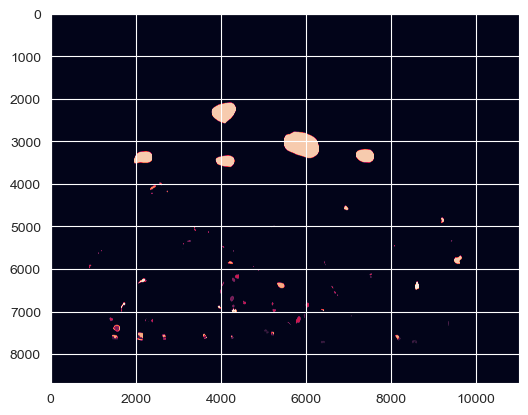

In [19]:
import matplotlib.pyplot as plt
plt.imshow(ground_truth_mask)

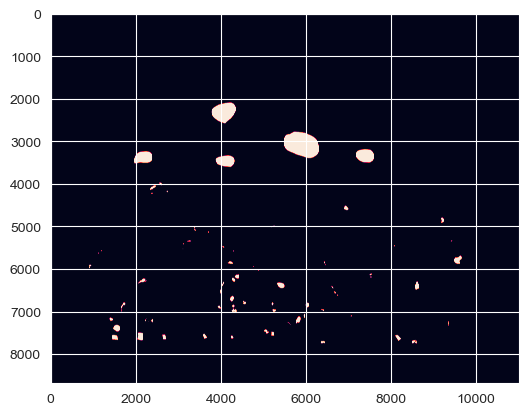

In [20]:
### As seen above, make the ground_truth_mask binary and apply it to the wsimask to compare the same segmentation areas:
binary_ground_truth_mask = ground_truth_mask > 0
plt.imshow(binary_ground_truth_mask)

In [21]:
wsimask = wsimask * binary_ground_truth_mask

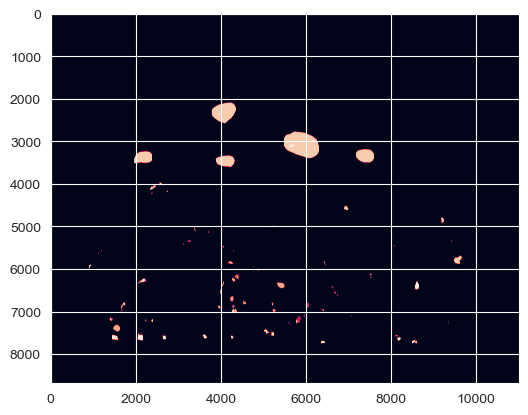

In [22]:
plt.imshow(wsimask)

In [23]:
wsimask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [24]:
ground_truth_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [25]:
np.unique(ground_truth_mask,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=uint8),
 array([94349581,    10171,    33743,     7323,    24426,     7792,
           44394,     9922,     6302,    12267,    65627,   928240,
           48525], dtype=int64))

In [26]:
np.unique(wsimask,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=uint8),
 array([94349581,     1745,    11402,      397,     5865,      745,
           19589,     2031,     7891,     3373,   106450,   928114,
          111130], dtype=int64))

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_true = ground_truth_mask.flatten()
y_pred = wsimask.flatten()
conf_matrix = confusion_matrix(y_true,y_pred,labels=[1,2,3,4,5,6,7,8,9,10,11,12])
conf_matrix

array([[     0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,  10171],
       [    91,     39,      0,      0,      0,      0,      0,      0,
             0,      3,      0,  33610],
       [   656,    534,    199,   1809,      0,    168,      0,    113,
             0,   3844,      0,      0],
       [     0,    172,    197,    989,    355,    804,     11,   1852,
           795,  19251,      0,      0],
       [     0,      4,      0,    176,      0,      0,      0,      0,
             0,   5531,    859,   1222],
       [     0,     20,      1,   1097,      7,  18617,    384,   5261,
            14,  18225,      0,    768],
       [     0,      0,      0,      0,     34,      0,   1636,    131,
          1033,   3508,    735,   2845],
       [     0,      0,      0,      0,      0,      0,      0,    388,
           159,   2367,   3215,    173],
       [    71,      0,      0,      0,      3,      0,      0,     65,
           300,   4232, 

In [56]:
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1) # tp/tp+fn
precision = np.diag(conf_matrix)/ np.sum(conf_matrix,axis=0) # tp/tp+fp
print(recall)
avg_recall = np.mean(recall)
print(avg_recall)

[0.         0.0011558  0.02717466 0.04048964 0.         0.41935847
 0.16488611 0.06156776 0.02445586 0.44696543 0.98748276 0.66458527]
0.23651014532167322


In [57]:
print(precision)
avg_precision = np.mean(precision)
print(avg_precision)

[0.         0.00342045 0.50125945 0.16862745 0.         0.95038032
 0.80551452 0.04916994 0.0889416  0.2755566  0.98761682 0.29019167]
0.3433899012395225


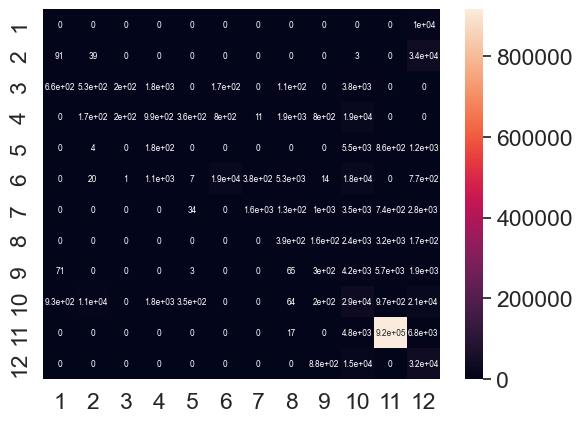

In [49]:
df_cm = pd.DataFrame(conf_matrix, range(1,13), range(1,13))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.5) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 6}) # font size
plt.show()